In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob


In [2]:
allFishDir = r'G:\.shortcut-targets-by-id\1oQgrbGfVR254q7c0eD7dSThsqkDA8J7A\exps_revision_ADO_paper\dbh_CoCHR_for_Alex_paper\MDR_ket_dbh_protocol\control'
fishList = sorted(glob.glob(allFishDir + '\\*'))

In [3]:
print(fishList)

['G:\\.shortcut-targets-by-id\\1oQgrbGfVR254q7c0eD7dSThsqkDA8J7A\\exps_revision_ADO_paper\\dbh_CoCHR_for_Alex_paper\\MDR_ket_dbh_protocol\\control\\2024-02-13_17-24-16_fish001', 'G:\\.shortcut-targets-by-id\\1oQgrbGfVR254q7c0eD7dSThsqkDA8J7A\\exps_revision_ADO_paper\\dbh_CoCHR_for_Alex_paper\\MDR_ket_dbh_protocol\\control\\2024-02-13_17-39-22_fish001', 'G:\\.shortcut-targets-by-id\\1oQgrbGfVR254q7c0eD7dSThsqkDA8J7A\\exps_revision_ADO_paper\\dbh_CoCHR_for_Alex_paper\\MDR_ket_dbh_protocol\\control\\2024-02-13_18-14-45_fish001', 'G:\\.shortcut-targets-by-id\\1oQgrbGfVR254q7c0eD7dSThsqkDA8J7A\\exps_revision_ADO_paper\\dbh_CoCHR_for_Alex_paper\\MDR_ket_dbh_protocol\\control\\2024-02-13_18-33-30_fish001', 'G:\\.shortcut-targets-by-id\\1oQgrbGfVR254q7c0eD7dSThsqkDA8J7A\\exps_revision_ADO_paper\\dbh_CoCHR_for_Alex_paper\\MDR_ket_dbh_protocol\\control\\2024-02-13_18-44-34_fish001', 'G:\\.shortcut-targets-by-id\\1oQgrbGfVR254q7c0eD7dSThsqkDA8J7A\\exps_revision_ADO_paper\\dbh_CoCHR_for_Alex_paper

In [4]:
for fishDir in fishList:
    if not ('.ini' in fishDir):
        fish_dir = fishDir + '\\rawdata'
        fileListHT = sorted(glob.glob(fish_dir+'\\*head_tail_data.npz'))
        fileListStim = sorted(glob.glob(fish_dir+'\\*stimulus_data.npz'))

In [5]:
fish_data = []
fish_stim = []
for fishDir in fishList:
    if not ('.ini' in fishDir):
        fish_dir = fishDir + '\\rawdata'
        fileListHT = sorted(glob.glob(fish_dir+'\\*head_tail_data.npz'))
        fileListStim = sorted(glob.glob(fish_dir+'\\*stimulus_data.npz'))
    trial = {}
    trial['tail_angle'] = []
    trial['bout'] = []
    trial['time'] = []
    trial['tail_vigor'] = []
    stim = {}
    stim['start_times'] = []
    for file in fileListHT:
        data = np.load(file)
        trial['tail_angle'].append(data['tail_tip_deflection'])
        trial['bout'].append(data['tail_bout_information'])
        trial['time'].append(data['camera_time'])
        trial['tail_vigor'].append(data['tail_vigor'])

    for file in fileListStim:
        stimdata = np.load(file)
        stim['start_times'].append(stimdata['stimulus_start_times'])
        
    fish_data.append(trial)
    fish_stim.append(stim)

In [6]:
fps_estimate = 10000/(trial['time'][0][10000] - trial['time'][0][0])
print(fps_estimate)



395.0729426136987


In [7]:
all_fish_cl_ol = []

<Figure size 2100x1300 with 0 Axes>

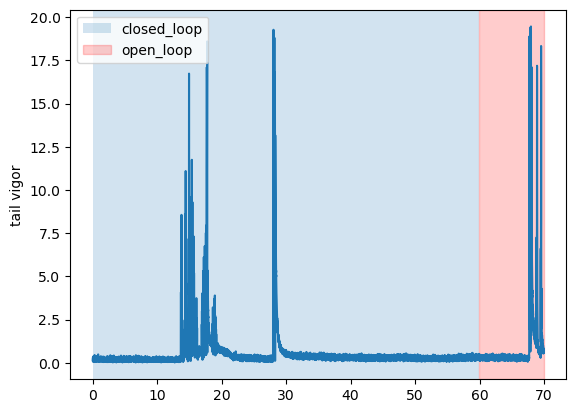

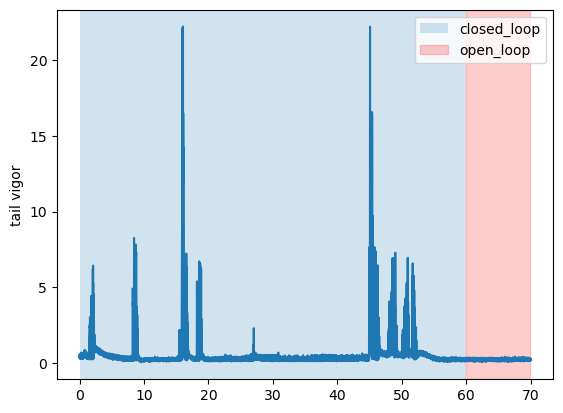

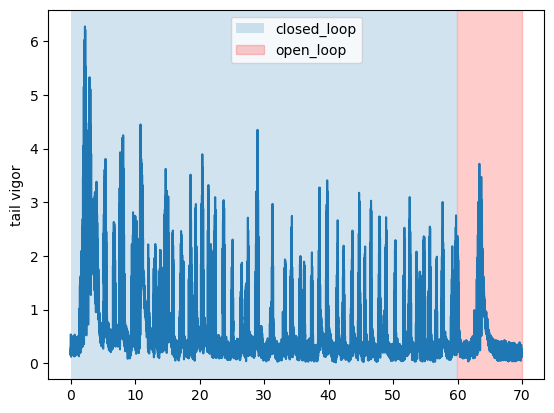

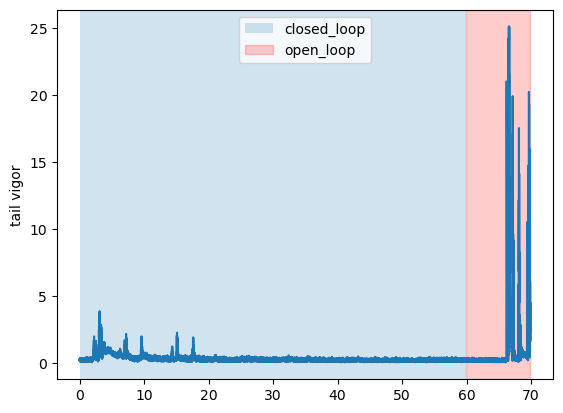

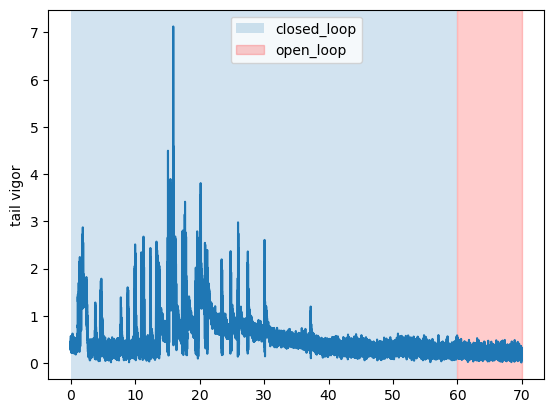

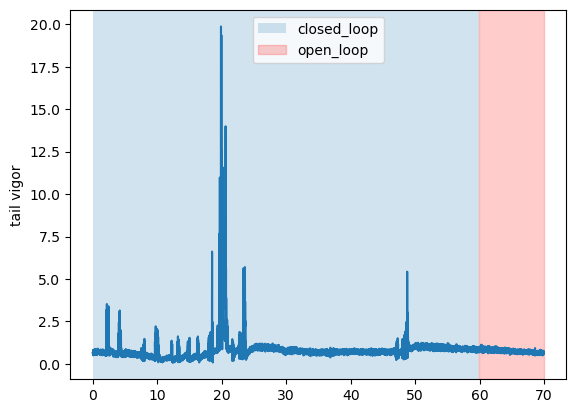

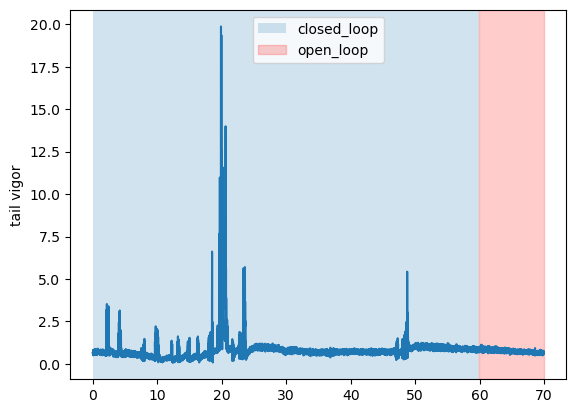

In [8]:
all_fish_cl_ol = []
all_cl_ol = []
plt.figure(figsize=(21,13))
numFish = len(fishList)
avg_vigors = np.zeros([numFish,2])
for j in range(numFish):
    cl_inds = []
    ol_inds = []
    cl_ind_lengths = []
    ol_ind_lengths = []
    numTrials = len(fish_stim[j]['start_times'])
    for i in range(numTrials):
        cl_start = fish_stim[j]['start_times'][i][0]+60
        cl_end = fish_stim[j]['start_times'][i][0]+120
        ol_start = fish_stim[j]['start_times'][i][0]+120
        ol_end = fish_stim[j]['start_times'][i][0]+240
        cl_ind = np.where((fish_data[j]['time'][i] >= cl_start) & (fish_data[j]['time'][i] < cl_end))
        ol_ind = np.where((fish_data[j]['time'][i] >= ol_start) & (fish_data[j]['time'][i] < ol_end))
        cl_ind_lengths.append(len(cl_ind[0]))
        ol_ind_lengths.append(len(ol_ind[0]))
        cl_inds.append(cl_ind)
        ol_inds.append(ol_ind)
    cl_ind_length = np.min(cl_ind_lengths)
    ol_ind_length = np.min(ol_ind_lengths)
    cl_trials = np.zeros([numTrials,cl_ind_length])
    ol_trials = np.zeros([numTrials,ol_ind_length])
    for i in range(numTrials):
        indStart = cl_inds[i][0][0]
        indEnd = cl_inds[i][0][cl_ind_length-1]
        cl_trials[i] = np.abs(fish_data[j]['tail_angle'][i][indStart:indEnd+1] - np.mean(fish_data[j]['tail_angle'][i]))
        indStart = ol_inds[i][0][0]
        indEnd = ol_inds[i][0][ol_ind_length-1]
        ol_trials[i] = np.abs(fish_data[j]['tail_angle'][i][indStart:indEnd+1] - np.mean(fish_data[j]['tail_angle'][i]))
    mean_cl_trial = np.mean(cl_trials,axis=0)
    mean_ol_trial = np.mean(ol_trials,axis=0)
    cl_ol = np.concatenate((mean_cl_trial,mean_ol_trial))
    all_cl_ol.append(cl_ol)
    plt.figure()
    plt.plot(range(len(cl_ol))/fps_estimate,cl_ol)
    plt.axvspan(0, len(mean_cl_trial)/fps_estimate, alpha=0.2, label='closed_loop')
    plt.axvspan(len(mean_cl_trial)/fps_estimate,len(cl_ol)/fps_estimate, alpha=0.2, color = 'r',label='open_loop')
    plt.legend()
    plt.ylabel('tail vigor')
    #plt.ylim(0,100)
    avg_vigors[j,0] = np.mean(mean_cl_trial)
    avg_vigors[j,1] = np.mean(mean_ol_trial)
#plt.savefig(r'C:\Users\14076\Documents\ketamine_expts\with_marc\figures\prazosin.png',dpi=300)

In [9]:
a = []
for i in range(len(all_cl_ol)):
    a.append(len(all_cl_ol[i]))
trialLen = np.min(a)
print(trialLen)

27613


In [10]:
allMeanSwimVigors = np.zeros([len(all_cl_ol),trialLen])
for i in range(len(all_cl_ol)):
    allMeanSwimVigors[i] = all_cl_ol[i][0:trialLen]

In [11]:
binSize=int(fps_estimate * 2)
numBins = int(trialLen/binSize)
print(numBins)

34


In [12]:
binnedVigor = np.zeros([len(all_cl_ol),numBins])
for i in range(numBins):
    binnedVigor[:,i] = np.mean(allMeanSwimVigors[:,(i*binSize):((i+1)*binSize)],axis=1)

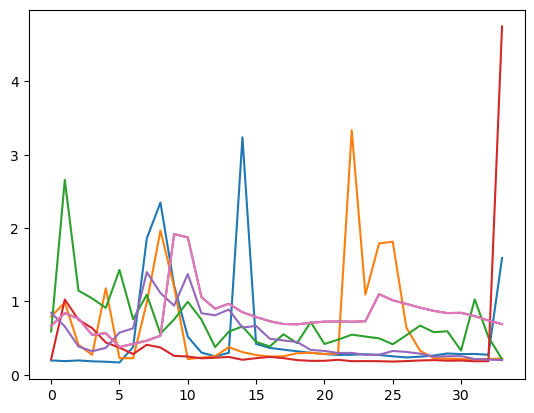

In [13]:
plt.figure()
for i in range(len(binnedVigor)):
    plt.plot(binnedVigor[i])

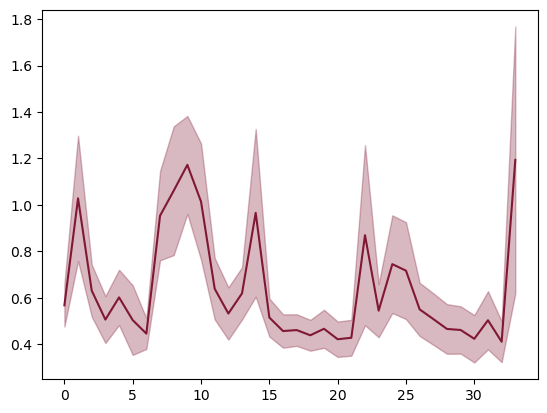

In [14]:
meanVigor = np.mean(binnedVigor,axis=0)
stdVigor = np.std(binnedVigor,axis=0) / np.sqrt(len(binnedVigor))
plt.figure()
plt.plot(meanVigor, color = [0.5,0.09,0.2])
plt.fill_between(x=range(len(stdVigor)),y1 = meanVigor - stdVigor, y2 = meanVigor + stdVigor,color = [0.5,0.09,0.2],alpha = 0.3)

<Figure size 2100x1300 with 0 Axes>

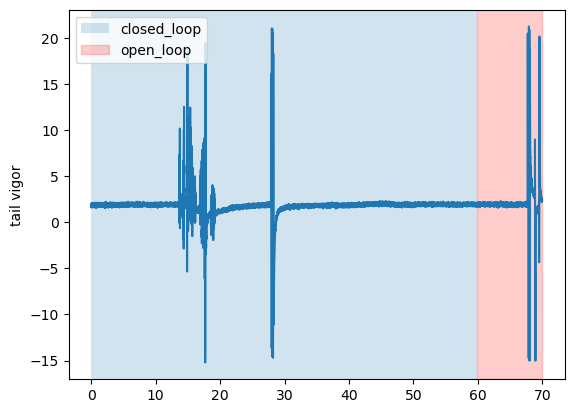

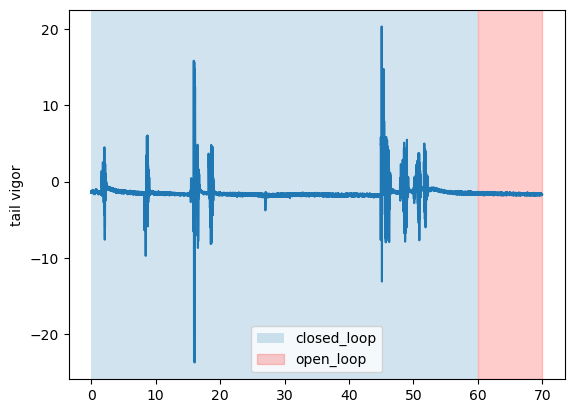

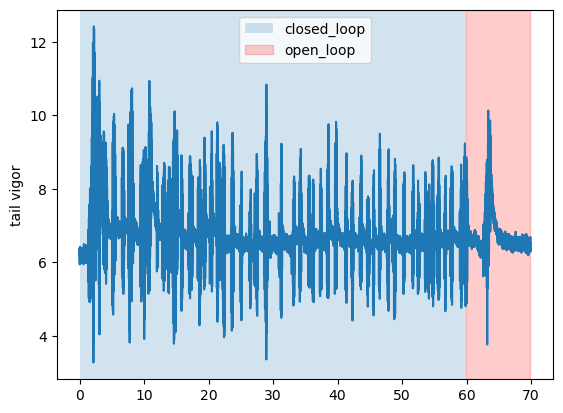

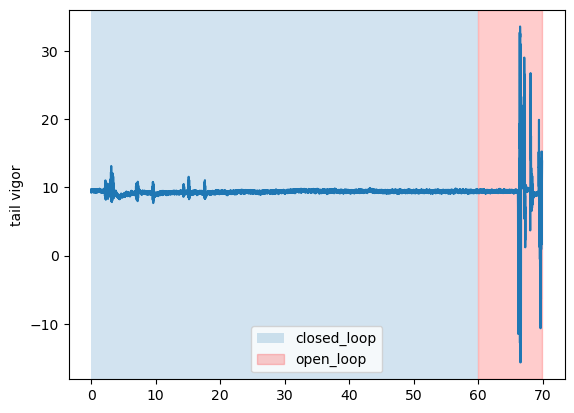

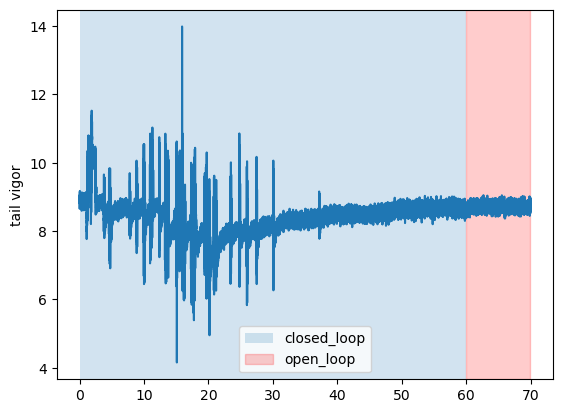

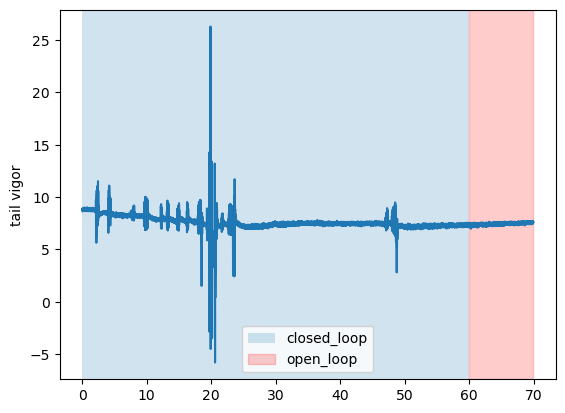

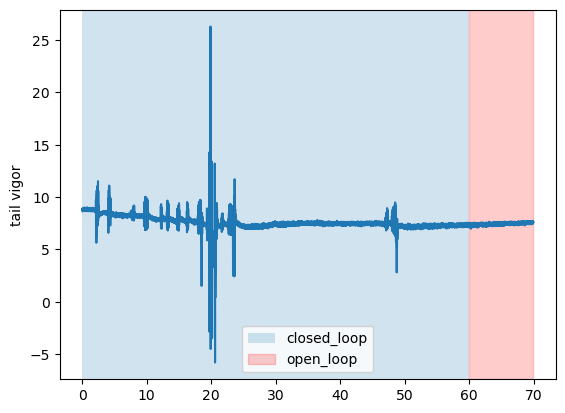

In [15]:
plt.figure(figsize=(21,13))
numFish = len(fishList)
avg_vigors = np.zeros([numFish,2])
for j in range(numFish):
    cl_inds = []
    ol_inds = []
    cl_ind_lengths = []
    ol_ind_lengths = []
    numTrials = len(fish_stim[j]['start_times'])
    for i in range(numTrials):
        cl_start = fish_stim[j]['start_times'][i][0]+60
        cl_end = fish_stim[j]['start_times'][i][0]+120
        ol_start = fish_stim[j]['start_times'][i][0]+120
        ol_end = fish_stim[j]['start_times'][i][0]+240
        cl_ind = np.where((fish_data[j]['time'][i] >= cl_start) & (fish_data[j]['time'][i] < cl_end))
        ol_ind = np.where((fish_data[j]['time'][i] >= ol_start) & (fish_data[j]['time'][i] < ol_end))
        cl_ind_lengths.append(len(cl_ind[0]))
        ol_ind_lengths.append(len(ol_ind[0]))
        cl_inds.append(cl_ind)
        ol_inds.append(ol_ind)
    cl_ind_length = np.min(cl_ind_lengths)
    ol_ind_length = np.min(ol_ind_lengths)
    cl_trials = np.zeros([numTrials,cl_ind_length])
    ol_trials = np.zeros([numTrials,ol_ind_length])
    for i in range(numTrials):
        indStart = cl_inds[i][0][0]
        indEnd = cl_inds[i][0][cl_ind_length-1]
        cl_trials[i] = fish_data[j]['tail_angle'][i][indStart:indEnd+1]
        indStart = ol_inds[i][0][0]
        indEnd = ol_inds[i][0][ol_ind_length-1]
        ol_trials[i] = fish_data[j]['tail_angle'][i][indStart:indEnd+1]
    mean_cl_trial = np.mean(cl_trials,axis=0)
    mean_ol_trial = np.mean(ol_trials,axis=0)
    cl_ol = np.concatenate((mean_cl_trial,mean_ol_trial))
    if(j!=-1):
        plt.figure()
        plt.plot(range(len(cl_ol))/fps_estimate,cl_ol)
        plt.axvspan(0, len(mean_cl_trial)/fps_estimate, alpha=0.2, label='closed_loop')
        plt.axvspan(len(mean_cl_trial)/fps_estimate,len(cl_ol)/fps_estimate, alpha=0.2, color = 'r',label='open_loop')
        plt.legend()
        plt.ylabel('tail vigor')
    avg_vigors[j,0] = np.mean(mean_cl_trial)
    avg_vigors[j,1] = np.mean(mean_ol_trial)
#plt.savefig(r'C:\Users\14076\Documents\ketamine_expts\with_marc\figures\prazosin.png',dpi=300)

In [22]:
swim_trace = np.copy(cl_trials[0])
post = 90
app_st = np.append(swim_trace,np.zeros([1,post]))
std_st = np.zeros(np.shape(swim_trace))
for i in range(len(std_st)):
    std_st[i] = np.std(app_st[i:(i+post)])

(0.0, 1.0)

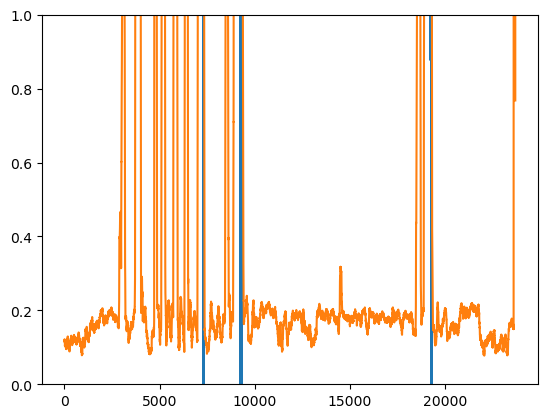

In [23]:
plt.figure()
plt.plot(swim_trace)
plt.plot(std_st)
#plt.xlim(1900,2000)
plt.ylim(0,1)

In [24]:
plt.figure(figsize=(21,13))
numFish = len(fishList)
avg_vigors = np.zeros([numFish,2])
cl_ol_std_allfish = []
angle_allfish = []
for j in range(numFish):
    cl_inds = []
    ol_inds = []
    cl_ind_lengths = []
    ol_ind_lengths = []
    numTrials = len(fish_stim[j]['start_times'])
    for i in range(numTrials):
        cl_start = fish_stim[j]['start_times'][i][0]+60
        cl_end = fish_stim[j]['start_times'][i][0]+120
        ol_start = fish_stim[j]['start_times'][i][0]+120
        ol_end = fish_stim[j]['start_times'][i][0]+240
        cl_ind = np.where((fish_data[j]['time'][i] >= cl_start) & (fish_data[j]['time'][i] < cl_end))
        ol_ind = np.where((fish_data[j]['time'][i] >= ol_start) & (fish_data[j]['time'][i] < ol_end))
        cl_ind_lengths.append(len(cl_ind[0]))
        ol_ind_lengths.append(len(ol_ind[0]))
        cl_inds.append(cl_ind)
        ol_inds.append(ol_ind)
    cl_ind_length = np.min(cl_ind_lengths)
    ol_ind_length = np.min(ol_ind_lengths)
    cl_trials = np.zeros([numTrials,cl_ind_length])
    ol_trials = np.zeros([numTrials,ol_ind_length])
    cl_ol_trials = np.zeros([numTrials,cl_ind_length + ol_ind_length])
    cl_ol_std = np.zeros(np.shape(cl_ol_trials))
    post = 45
    for i in range(numTrials):
        indStart = cl_inds[i][0][0]
        indEnd = cl_inds[i][0][cl_ind_length-1]
        cl_trials[i] = fish_data[j]['tail_angle'][i][indStart:indEnd+1]
        indStart = ol_inds[i][0][0]
        indEnd = ol_inds[i][0][ol_ind_length-1]
        ol_trials[i] = fish_data[j]['tail_angle'][i][indStart:indEnd+1]
        cl_ol_trials[i] = np.concatenate((cl_trials[i],ol_trials[i]))
        cl_ol_app = np.append(cl_ol_trials[i],np.zeros([1,post]))
        for k in range(len(cl_ol_trials[i])):
            cl_ol_std[i,k] = np.std(cl_ol_app[k:(k+post)])
    mean_cl_trial = np.mean(cl_trials,axis=0)
    mean_ol_trial = np.mean(ol_trials,axis=0)
    cl_ol = np.concatenate((mean_cl_trial,mean_ol_trial))
    cl_ol_std_allfish.append(cl_ol_std)
    angle_allfish.append(cl_ol_trials)
    
#plt.savefig(r'C:\Users\14076\Documents\ketamine_expts\with_marc\figures\prazosin.png',dpi=300)

<Figure size 2100x1300 with 0 Axes>

<Figure size 640x480 with 0 Axes>

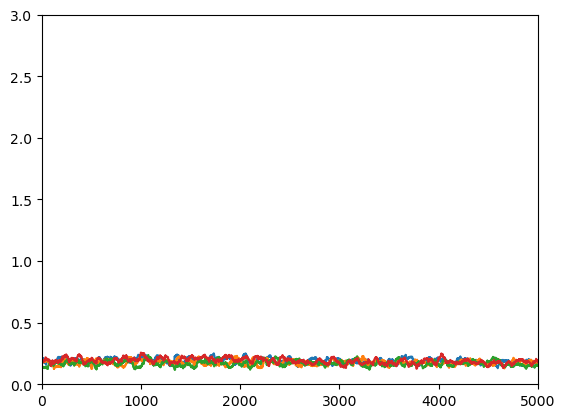

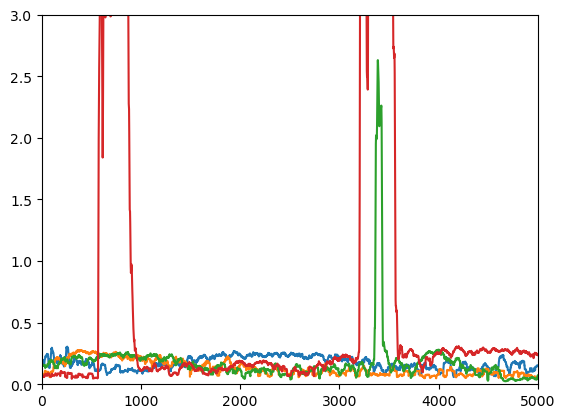

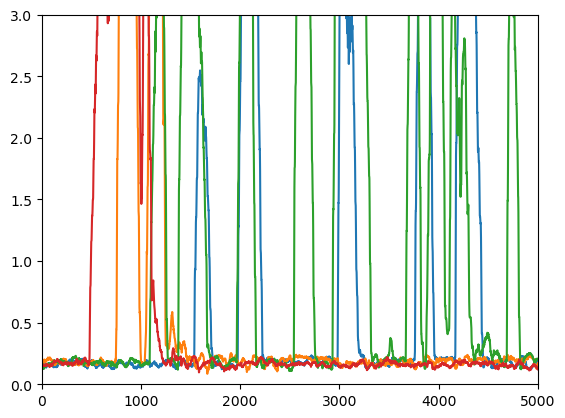

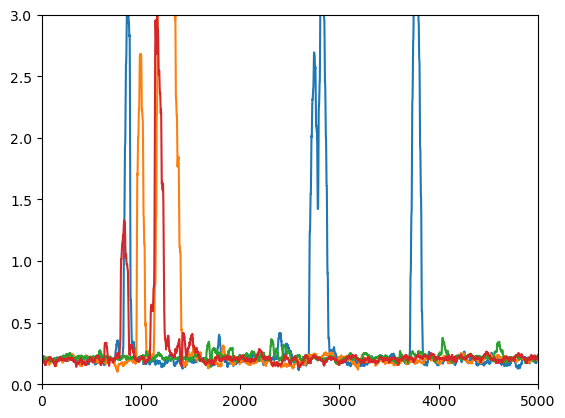

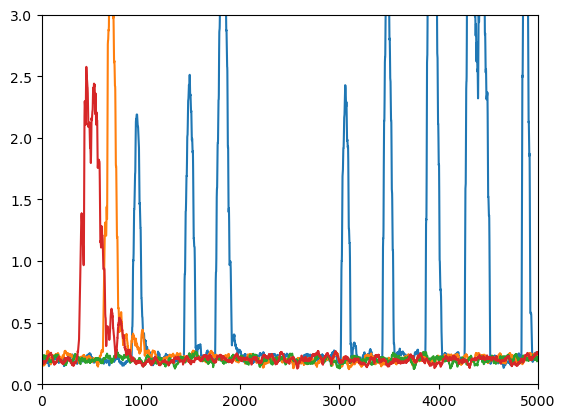

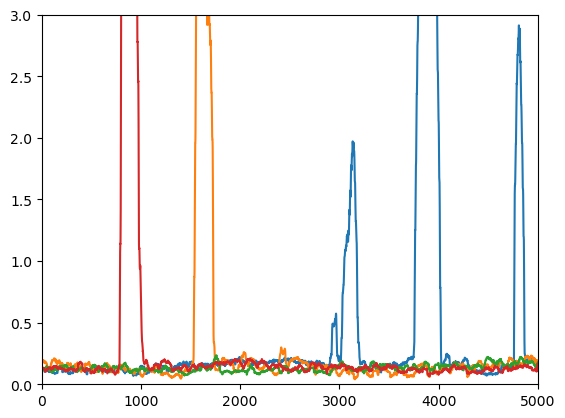

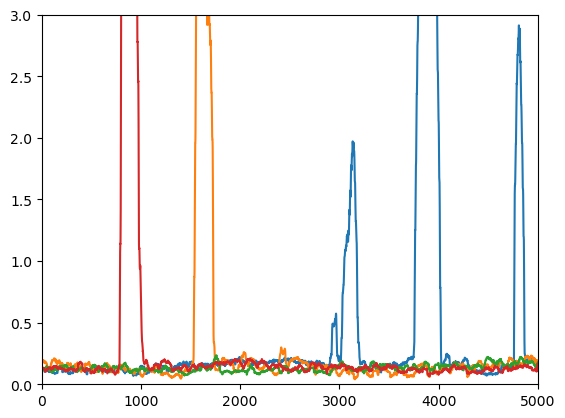

In [25]:
plt.figure()
#plt.plot(cl_ol_trials[0])
for i in range(numFish):
    plt.figure()
    for j in range(len(cl_ol_std_allfish[i])):
        plt.plot(cl_ol_std_allfish[i][j])
    plt.xlim(0,5000)
    plt.ylim(0,3)


In [26]:
from scipy.signal import find_peaks

In [27]:
ft_swim_times = {}
ft_swim_times['swims'] = []
ft_swim_times['times'] = []
for i in range(numFish):
    t_swim_times = []
    swim_raster = np.zeros(np.shape(cl_ol_std_allfish[i]))
    for j in range(len(cl_ol_std_allfish[i])):
        swims, mags = find_peaks(cl_ol_std_allfish[i][j], height = 1, distance = 90)
        t_swim_times.append(swims)
        swim_raster[j][swims] = mags['peak_heights']
    ft_swim_times['swims'].append(swim_raster)
    ft_swim_times['times'].append(t_swim_times)

(-1.0, 40.0)

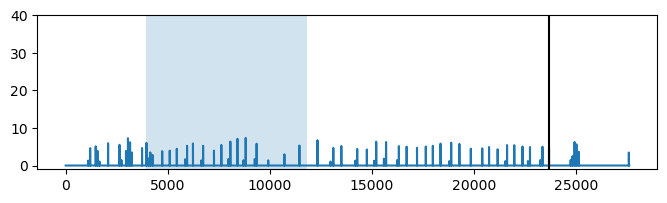

In [28]:
plt.figure(figsize=(8,2))
plt.plot(ft_swim_times['swims'][2][2])
plt.axvline(x=60*fps_estimate,color = 'black')
plt.axvspan(10*fps_estimate, 30*fps_estimate, alpha=0.2, label='closed_loop')
plt.ylim(-1,40)
#plt.xlim(0,10000)
#plt.savefig(r'G:\My Drive\adenosine_paper_figures\Fig1\sample_trace.svg',dpi=300)

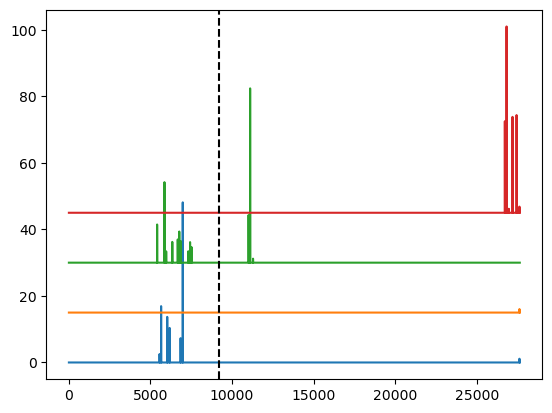

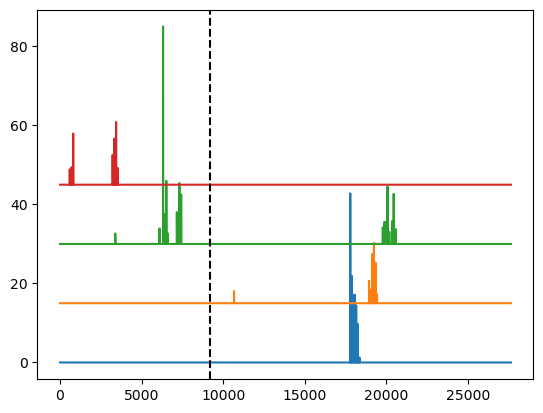

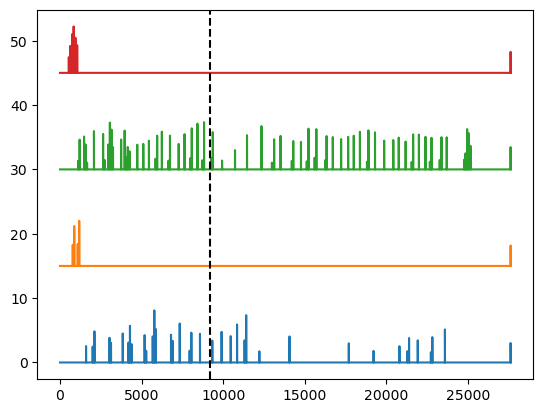

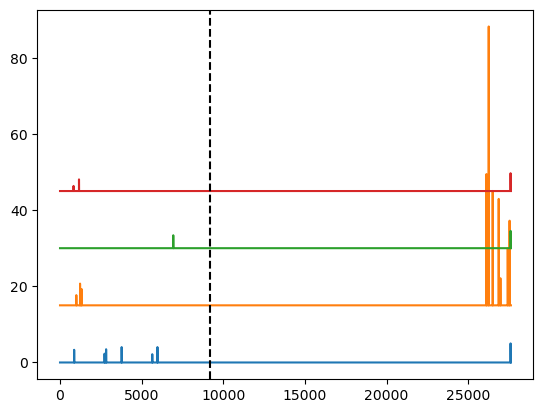

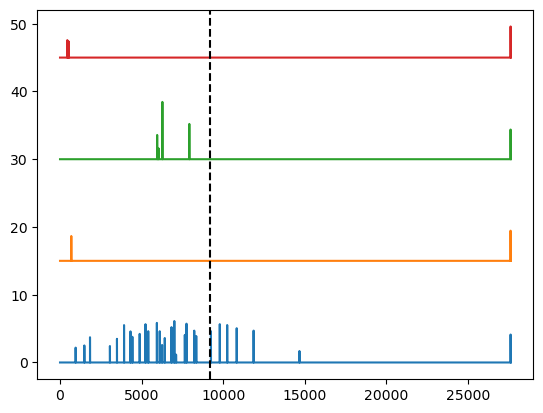

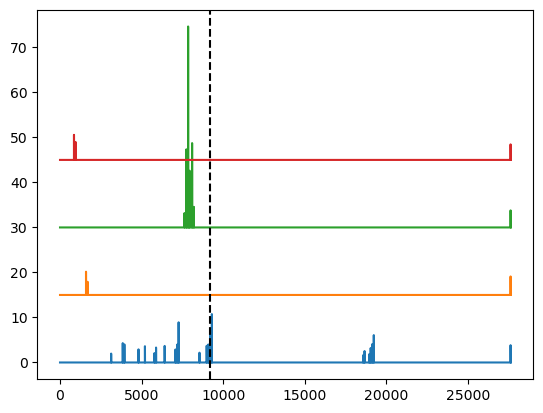

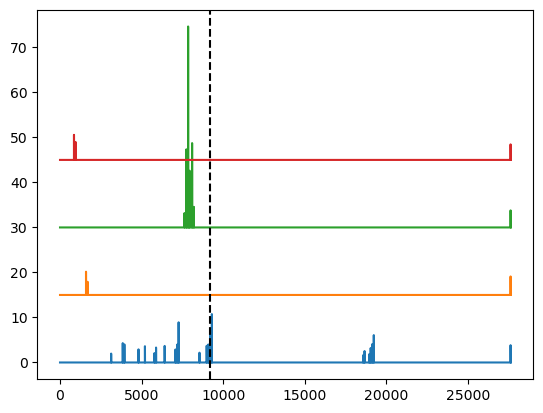

In [29]:
for i in range(len(ft_swim_times['swims'])):
    plt.figure()
    for j in range(len(ft_swim_times['swims'][i])):
        plt.plot(ft_swim_times['swims'][i][j] + 15 * j)
    plt.axvline(x=len(ft_swim_times['swims'][i][j])/3, color = 'black', linestyle = '--')
    #if i == 2:
        #plt.savefig(r'G:\My Drive\adenosine_paper\adenosine_paper_figures\figS1\for_rebuttal\example_fish.svg')

In [30]:
passivity_onsets = []
numFrames = len(ft_swim_times['swims'][0][0])
for i in range(len(ft_swim_times['times'])):
    passivity_onset_fish = []
    for j in range(len(ft_swim_times['times'][i])):
        swim_times = ft_swim_times['times'][i][j]
        diff_times = np.diff(swim_times)
        passivity_durations = np.where(diff_times > fps_estimate*5)[0]
        if len(passivity_durations) > 0: # does the fish become passive at all?
            onset_frames = ft_swim_times['times'][i][j][passivity_durations]
            ol_onset_frames = np.where(onset_frames > (numFrames/3))[0]
            if(len(ol_onset_frames) > 0):#first passivity in OL
                #print(onset_frames[ol_onset_frames[0]])
                passivity_onset = onset_frames[ol_onset_frames[0]]
                passivity_onset_fish.append(passivity_onset)
            else:
                passivity_onset_fish.append(-1)
        else:
            passivity_onset_fish.append(-1)
    passivity_onsets.append(passivity_onset_fish)
        

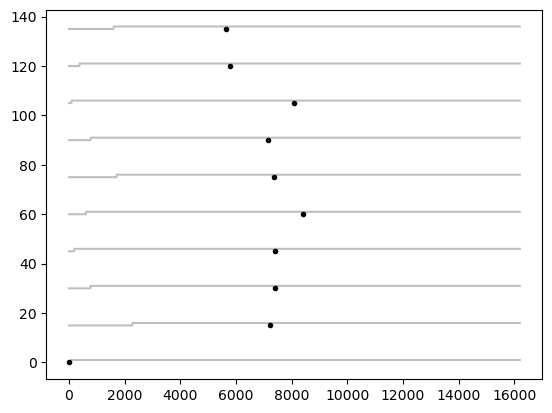

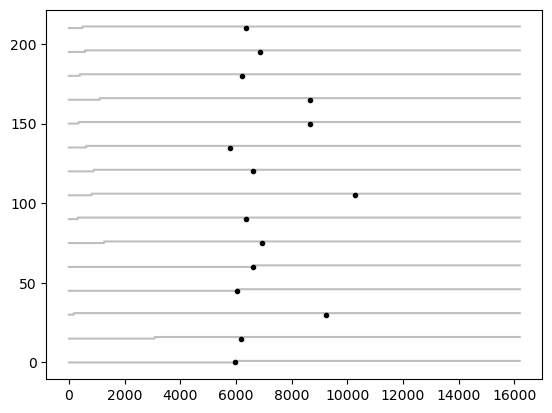

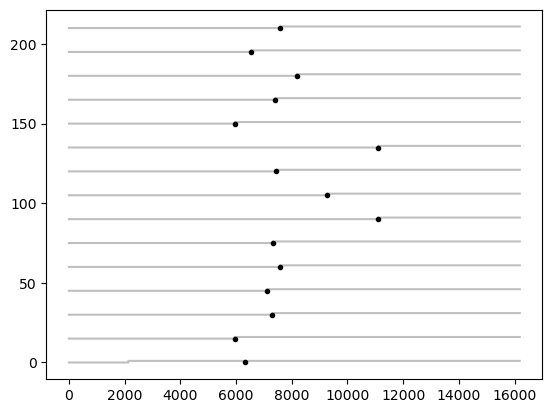

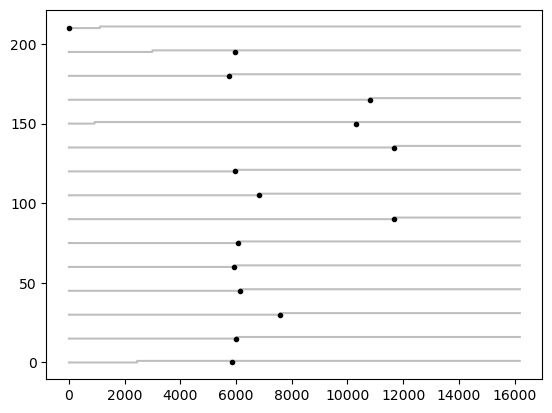

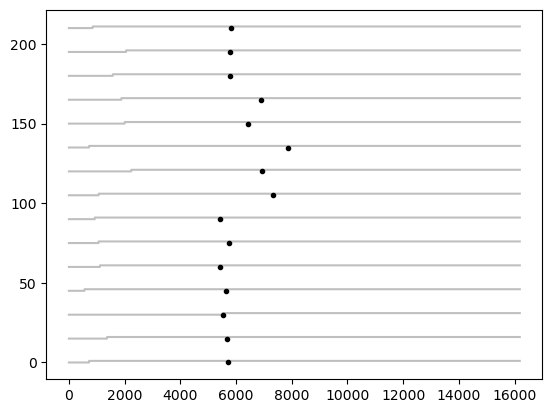

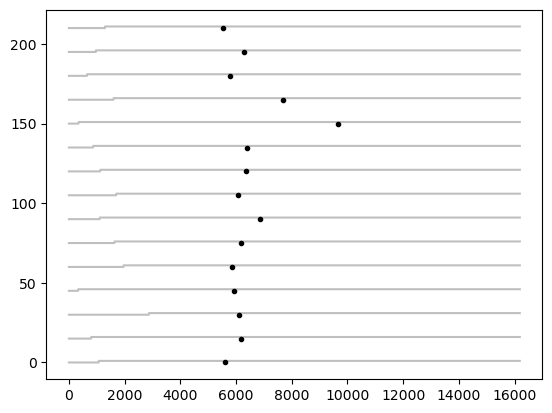

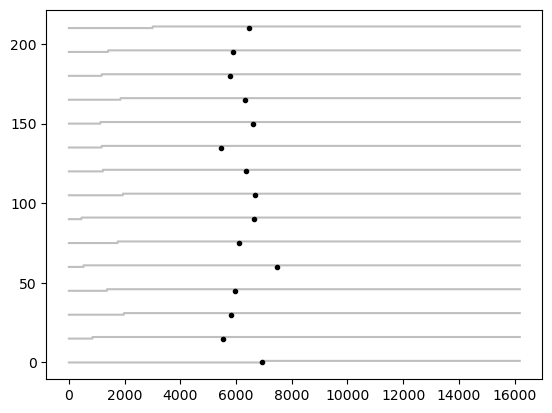

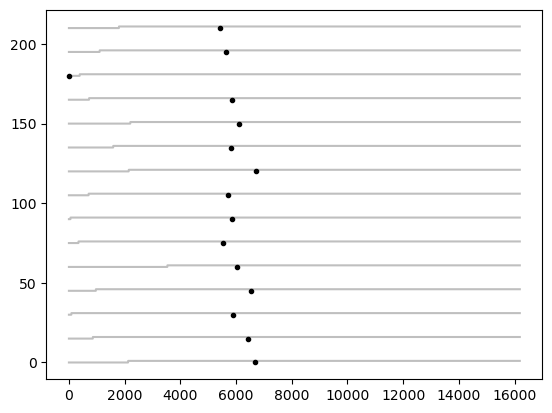

In [205]:
for i in range(len(ft_swim_times['swims'])):
    plt.figure()
    for j in range(len(ft_swim_times['swims'][i])):
        plt.plot(ft_swim_times['swims'][i][j] + 15 * j, color = 'gray', alpha = 0.5)
        onset = passivity_onsets[i][j]
        plt.plot(onset,15*j,'.', color = 'black')
    #plt.axvline(x=len(ft_swim_times['swims'][i][j])/3, color = 'black', linestyle = '--')
    #if i == 2:
        #plt.savefig(r'G:\My Drive\adenosine_paper\adenosine_paper_figures\figS1\for_rebuttal\example_fish.svg')

In [206]:
truncated_swims = ft_swim_times['swims'].copy()
for i in range(len(truncated_swims)):
    for j in range(len(truncated_swims[i])):
        onset = passivity_onsets[i][j]
        trial = truncated_swims[i][j]
        if (onset >= 0):
            truncated_swims[i][j][0:onset] = 0
            truncated_swims[i][j][onset:] = 1
        else:
            truncated_swims[i][j] = 0

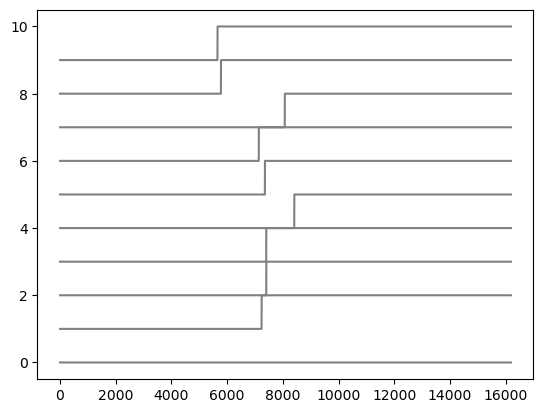

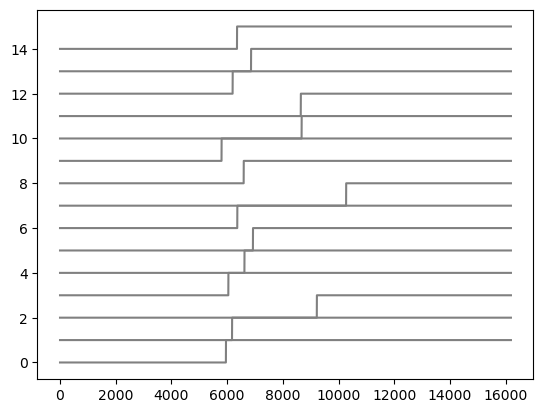

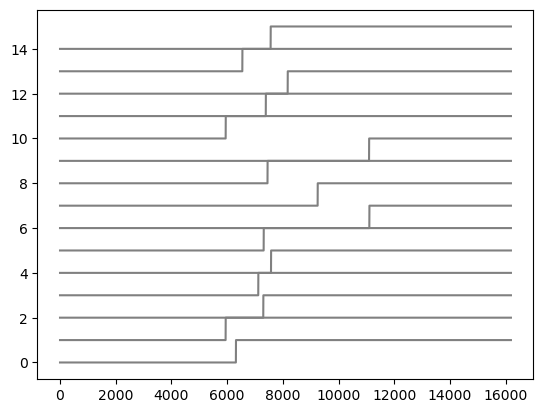

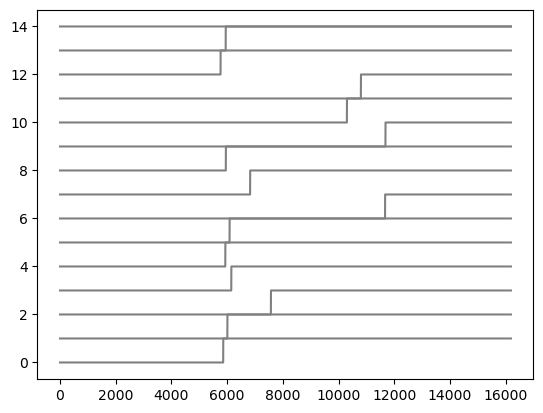

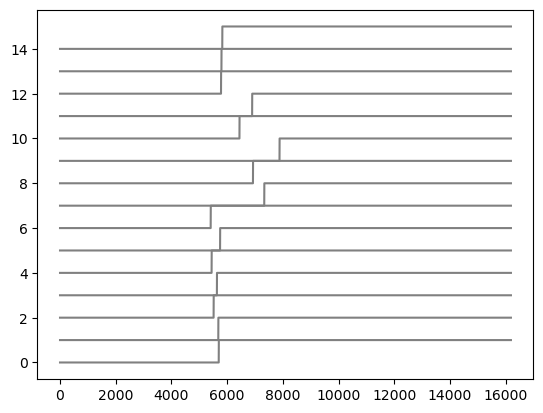

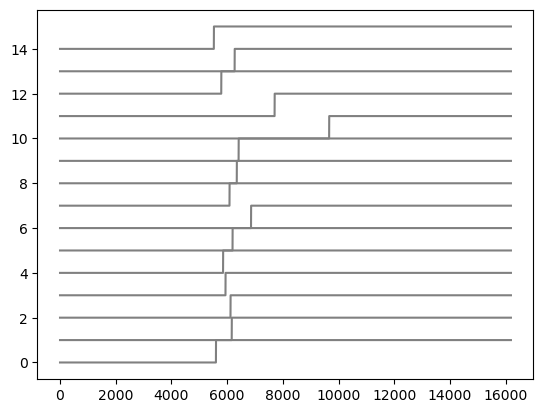

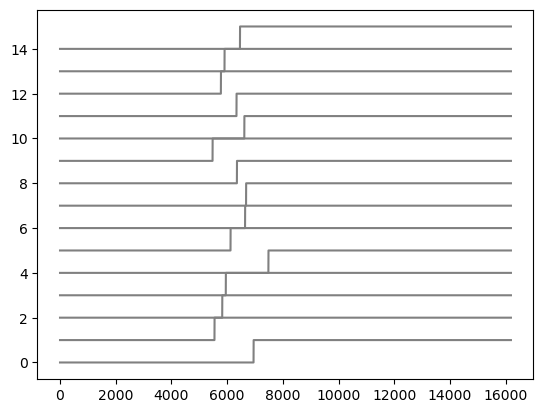

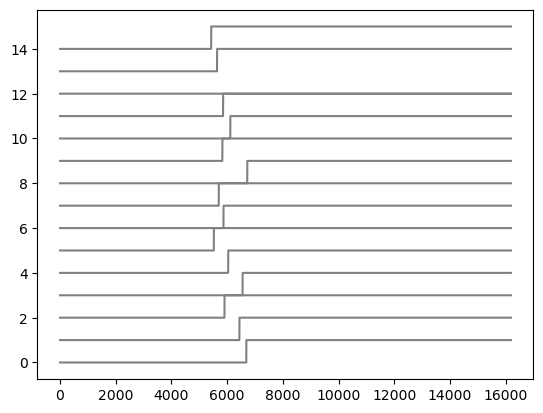

In [207]:
for i in range(len(truncated_swims)):
    plt.figure()
    for j in range(len(truncated_swims[i])):
        plt.plot(truncated_swims[i][j] + 1 * j, color = 'gray')
    #plt.axvline(x=len(ft_swim_times['swims'][i][j])/3, color = 'black', linestyle = '--')
    #if i == 2:
        #plt.savefig(r'G:\My Drive\adenosine_paper\adenosine_paper_figures\figS1\for_rebuttal\example_fish.svg')

In [208]:
mean_truncated_swims = []
for i in range(len(truncated_swims)):
    mean_truncated_swims.append(np.mean(truncated_swims[i],axis=0)[0:16189])
mean_truncated_swims = np.array(mean_truncated_swims)

In [243]:
mean_raw_swims = []
for i in range(len(truncated_swims)):
    mean_raw_swims.append(np.mean(ft_swim_times['swims'][i],axis=0)[0:16189])
mean_raw_swims = np.array(mean_raw_swims)

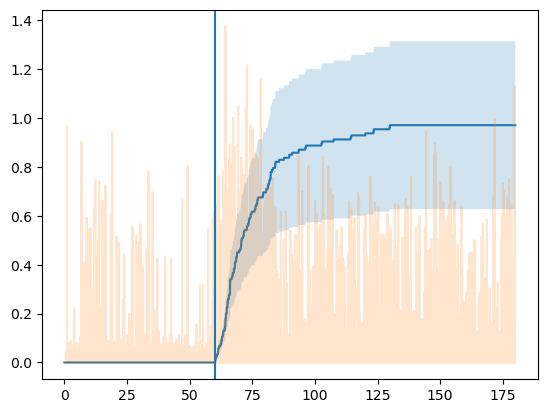

In [257]:
mean_across_fish = np.mean(mean_truncated_swims,axis=0)
std_across_fish = np.mean(mean_truncated_swims,axis=0)/np.sqrt(len(mean_truncated_swims))
mean_across_fish_s = np.mean(mean_raw_swims,axis=0)
time = np.linspace(0,180,len(mean_across_fish))
plt.figure()
plt.plot(time,mean_across_fish)
plt.fill_between(time,mean_across_fish - std_across_fish, mean_across_fish + std_across_fish, alpha = 0.2)
plt.plot(time,mean_across_fish_s,alpha = 0.2)
plt.axvline(x=60)

In [258]:
ft_swim_times = {}
ft_swim_times['swims'] = []
ft_swim_times['times'] = []
all_rasters = []
all_rasters_stop = []
for i in range(numFish):
    t_swim_times = []
    swim_raster = np.zeros(np.shape(cl_ol_std_allfish[i]))
    stop_raster = np.ones(np.shape(cl_ol_std_allfish[i]))
    for j in range(len(cl_ol_std_allfish[i])):
        swims, mags = find_peaks(cl_ol_std_allfish[i][j], height = 1, distance = 90)
        t_swim_times.append(swims)
        swim_raster[j][swims] = 1
        stop_raster = stop_raster - swim_raster
    ft_swim_times['swims'].append(swim_raster)
    ft_swim_times['times'].append(t_swim_times)
    all_rasters.append(np.mean(swim_raster,axis=0))
    all_rasters_stop.append(np.mean(stop_raster,axis=0))

In [259]:
all_raster_len = np.zeros([len(all_rasters),trialLen])
all_raster_len_stop = np.zeros([len(all_rasters),trialLen])
for i in range(len(all_rasters)):
    all_raster_len[i] = all_rasters[i][0:trialLen]
    all_raster_len_stop[i] = all_rasters_stop[i][0:trialLen]

all_raster_len_stop[all_raster_len_stop<0] = 0

In [287]:
binSize=int(fps_estimate * 2)
numBins = int(trialLen/binSize)
print(numBins)

90


In [293]:
binnedSwims = np.zeros([len(all_rasters),numBins])
binnedStops = np.zeros([len(all_rasters),numBins])
binnedTruncSwims = np.zeros([len(all_rasters),numBins])
for i in range(numBins):
    binnedSwims[:,i] = np.sum(all_raster_len[:,(i*binSize):((i+1)*binSize)],axis=1)/2
    binnedStops[:,i] = np.min(all_raster_len_stop[:,(i*binSize):((i+1)*binSize)],axis=1)
    binnedTruncSwims[:,i] = np.mean(mean_truncated_swims[:,(i*binSize):((i+1)*binSize)],axis=1)

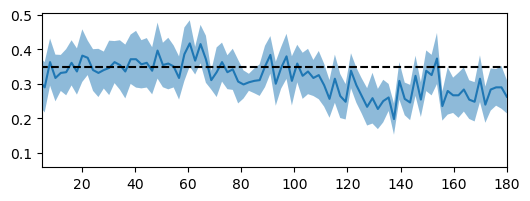

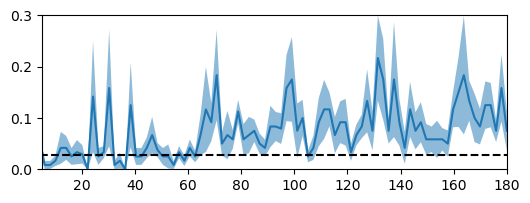

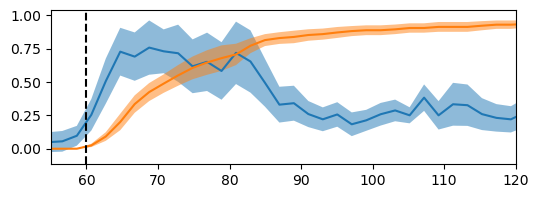

In [298]:
time = np.linspace(0,180,numBins)

stdSwimRate = np.std(binnedSwims,axis=0)/ np.sqrt(len(binnedVigor))
#stdSwimRate = (stdSwimRate)/np.std(np.mean(binnedSwims,axis=0)[0:30])
meanSwimRate = np.mean(binnedSwims,axis=0)
#meanSwimRate = (meanSwimRate- np.mean(meanSwimRate[0:30]))/np.std(meanSwimRate[0:30])
stdStopRate = np.std(binnedStops,axis=0)/ np.sqrt(len(binnedVigor))
#stdStopRate = (stdStopRate)/np.std(np.mean(binnedStops,axis=0)[0:30])
meanStopRate = np.mean(binnedStops,axis=0)
#meanStopRate = (meanStopRate- np.mean(meanStopRate[0:30]))/np.std(meanStopRate[0:30])
meanVigor = np.mean(binnedVigor,axis=0)
stdVigor = np.std(binnedVigor,axis=0) / np.sqrt(len(binnedVigor))/np.max(meanVigor)
meanVigor = (meanVigor - np.min(meanVigor[0:30]))/np.max(meanVigor)

meanTruncSwims = np.mean(binnedTruncSwims,axis=0)
stdTruncSwims = np.std(binnedTruncSwims,axis=0) / np.sqrt(len(binnedVigor))
#meanVigor = (meanVigor - np.mean(meanVigor[0:30]))/np.std(meanVigor[0:30])
#stdVigor = (stdVigor)/np.std( np.mean(binnedVigor,axis=0)[0:30])
plt.figure(figsize=(6,2))
plt.plot(time, meanSwimRate)
plt.fill_between(x = time, y1 = meanSwimRate-stdSwimRate, y2 = meanSwimRate + stdSwimRate,alpha = 0.5)
plt.plot(time,np.ones([len(meanSwimRate)])*np.median(meanSwimRate[0:30]),'--',color='black')
plt.xlim(5,180)
#plt.ylim(0.15,0.5)
#plt.savefig(r'G:\My Drive\adenosine_paper\adenosine_paper_figures\figS1\for_rebuttal\swimRate.svg',dpi=300)

plt.figure(figsize=(6,2))
plt.plot(time,meanStopRate)
plt.fill_between(x = time, y1 = meanStopRate-stdStopRate, y2 = meanStopRate + stdStopRate,alpha = 0.5)
plt.plot(time,np.ones([len(meanStopRate)])*np.median(meanStopRate[0:30]),'--',color='black')
#plt.plot(range(len(meanVigor)),np.zeros([len(meanVigor)]),'--',color='black')
plt.xlim(5,180)
plt.ylim(0,0.3)
#plt.savefig(r'G:\My Drive\adenosine_paper\adenosine_paper_figures\figS1\for_rebuttal\stopRate.svg',dpi=300)
plt.figure(figsize=(6,2))
plt.plot(time,meanVigor)
plt.fill_between(x = time, y1 = meanVigor-stdVigor, y2 = meanVigor + stdVigor,alpha = 0.5)
#plt.plot(time,np.ones([len(meanVigor)])*np.median(meanVigor[0:30]),'--',color='black')
plt.xlim(5,180)
#plt.savefig(r'G:\My Drive\adenosine_paper\adenosine_paper_figures\figS1\for_rebuttal\vigor.svg',dpi=300)
#plt.ylim(-1,20)
#plt.figure(figsize=(6,2))
plt.plot(time,meanTruncSwims)
plt.fill_between(x = time, y1 = meanTruncSwims-stdTruncSwims, y2 = meanTruncSwims + stdTruncSwims,alpha = 0.5)
#plt.plot(time,np.ones([len(meanVigor)])*np.median(meanVigor[0:30]),'--',color='black')
plt.axvline(x=60,linestyle='--',color = 'black')
plt.xlim(55,120 )
plt.savefig(r'G:\My Drive\adenosine_paper\adenosine_paper_figures\figS1\for_rebuttal\cumulative_prob.svg',dpi=300)

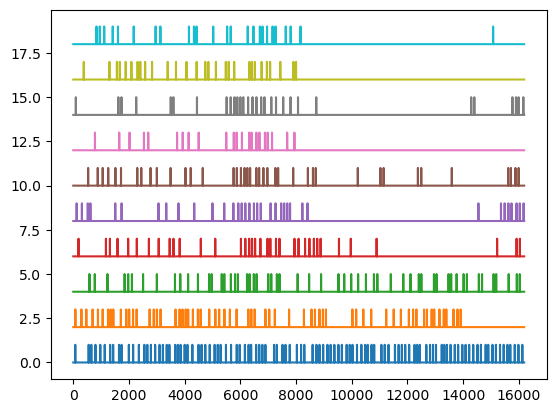

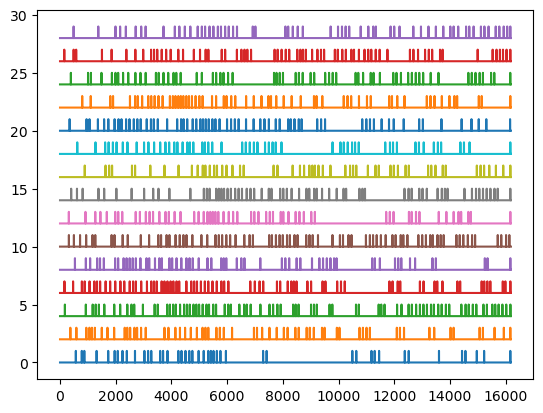

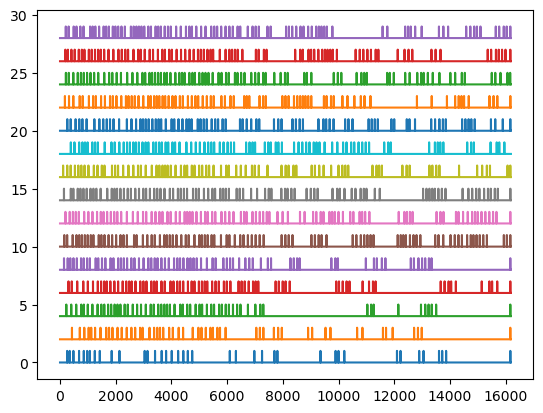

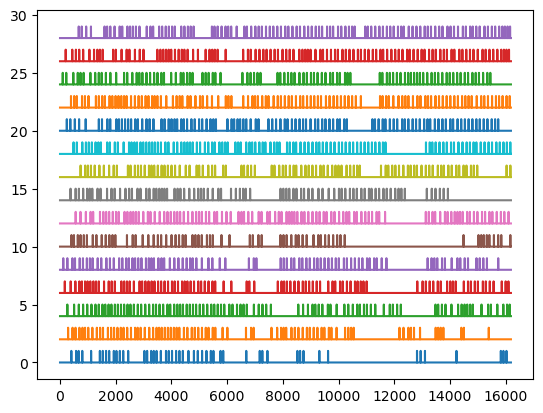

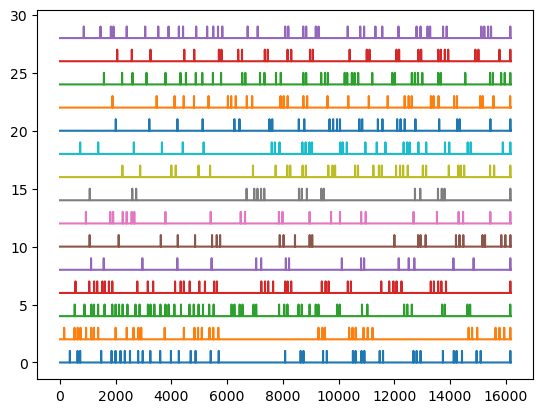

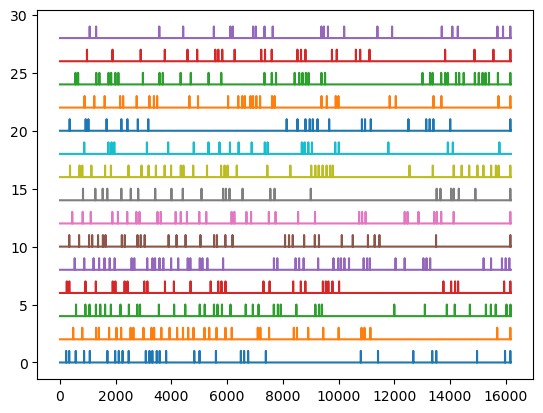

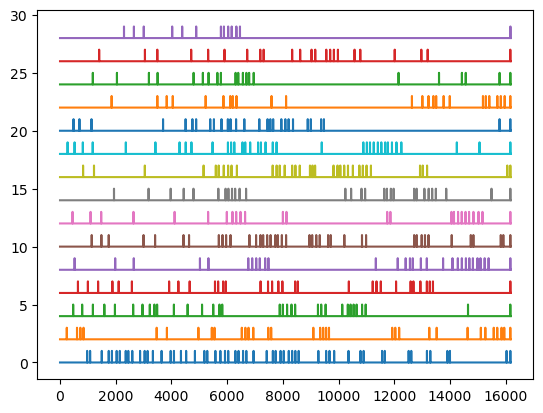

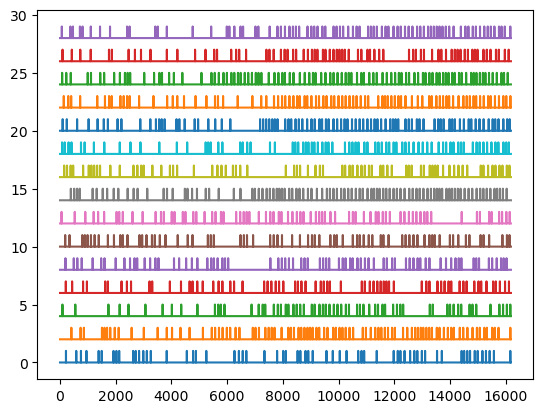

In [292]:
for i in range(len(ft_swim_times['swims'])):
    plt.figure()
    for j in range(len(ft_swim_times['swims'][i])):
        plt.plot(ft_swim_times['swims'][i][j] + 2 * j)

In [34]:
#np.save(r'G:\My Drive\adenosine_paper_good_controls\proc\ctrl\ctrl.npy',ft_swim_times)

In [35]:
len(fish_data[0]['tail_angle'][0])

22497

In [36]:
np.shape(cl_trials)
np.shape(ol_trials)

(15, 10792)

In [37]:
cl_ol_trials = np.hstack([cl_trials,ol_trials])
np.shape(cl_ol_trials)

(15, 16189)

<Figure size 1512x936 with 0 Axes>

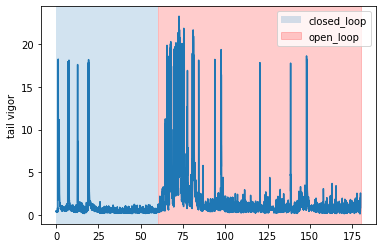

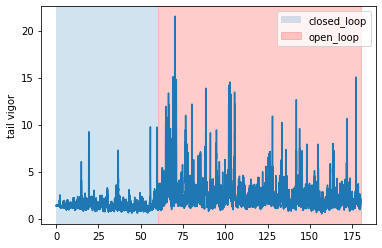

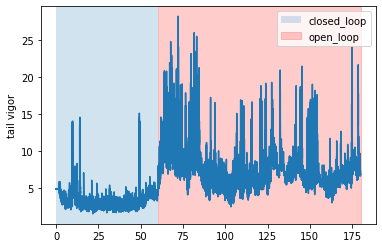

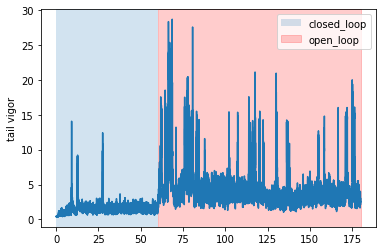

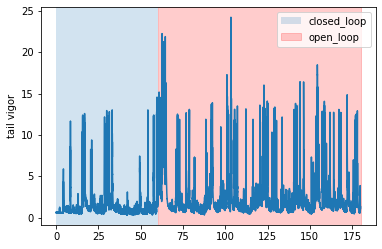

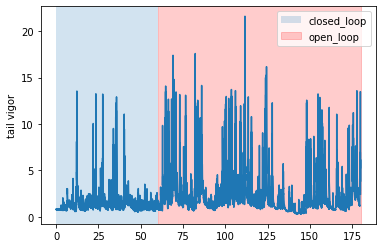

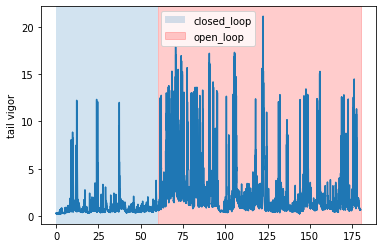

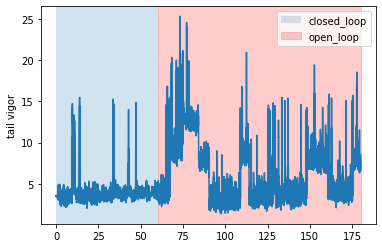

In [38]:
all_fish_cl_ol = []
all_cl_ol = []
plt.figure(figsize=(21,13))
numFish = len(fishList)
avg_vigors = np.zeros([numFish,2])
for j in range(numFish):
    cl_inds = []
    ol_inds = []
    cl_ind_lengths = []
    ol_ind_lengths = []
    numTrials = len(fish_stim[j]['start_times'])
    fish_cl_ol = []
    for i in range(numTrials):
        cl_start = fish_stim[j]['start_times'][i][0]+60
        cl_end = fish_stim[j]['start_times'][i][0]+120
        ol_start = fish_stim[j]['start_times'][i][0]+120
        ol_end = fish_stim[j]['start_times'][i][0]+240
        cl_ind = np.where((fish_data[j]['time'][i] >= cl_start) & (fish_data[j]['time'][i] < cl_end))
        ol_ind = np.where((fish_data[j]['time'][i] >= ol_start) & (fish_data[j]['time'][i] < ol_end))
        cl_ind_lengths.append(len(cl_ind[0]))
        ol_ind_lengths.append(len(ol_ind[0]))
        cl_inds.append(cl_ind)
        ol_inds.append(ol_ind)
    cl_ind_length = np.min(cl_ind_lengths)
    ol_ind_length = np.min(ol_ind_lengths)
    cl_trials = np.zeros([numTrials,cl_ind_length])
    ol_trials = np.zeros([numTrials,ol_ind_length])
    trial_cl_ol = []
    for i in range(numTrials):
        indStart = cl_inds[i][0][0]
        indEnd = cl_inds[i][0][cl_ind_length-1]
        cl_trials[i] = np.abs(fish_data[j]['tail_angle'][i][indStart:indEnd+1] - np.mean(fish_data[j]['tail_angle'][i]))
        indStart = ol_inds[i][0][0]
        indEnd = ol_inds[i][0][ol_ind_length-1]
        ol_trials[i] = np.abs(fish_data[j]['tail_angle'][i][indStart:indEnd+1] - np.mean(fish_data[j]['tail_angle'][i]))
    mean_cl_trial = np.mean(cl_trials,axis=0)
    mean_ol_trial = np.mean(ol_trials,axis=0)
    cl_ol_trials = np.hstack([cl_trials,ol_trials])
    all_fish_cl_ol.append(cl_ol_trials)
    cl_ol = np.concatenate((mean_cl_trial,mean_ol_trial))
    all_cl_ol.append(cl_ol)
    plt.figure()
    plt.plot(range(len(cl_ol))/fps_estimate,cl_ol)
    plt.axvspan(0, len(mean_cl_trial)/fps_estimate, alpha=0.2, label='closed_loop')
    plt.axvspan(len(mean_cl_trial)/fps_estimate,len(cl_ol)/fps_estimate, alpha=0.2, color = 'r',label='open_loop')
    plt.legend()
    plt.ylabel('tail vigor')
    #plt.ylim(0,100)
    avg_vigors[j,0] = np.mean(mean_cl_trial)
    avg_vigors[j,1] = np.mean(mean_ol_trial)
#plt.savefig(r'C:\Users\14076\Documents\ketamine_expts\with_marc\figures\prazosin.png',dpi=300)

In [39]:
#np.save(r'G:\My Drive\adenosine_paper_good_controls\proc\all_cl_ol_vigors.npy',all_fish_cl_ol)